In [5]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import imblearn
import statsmodels.api as sm
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model 

In [6]:
train = pd.read_csv('train.csv')
test_x = pd.read_csv('test.csv')
train = train.dropna(subset=['Embarked'])

train_x = train.drop(columns='Survived')
train_y = train.Survived
test_x.loc[152, 'Fare'] = np.mean(test_x.loc[:, 'Fare'])

# Data exploration

| Variable | Definition | Key |
| --- | --- | --- |
| Survival | Did the person survive? | 0 = No, 1 = Yes|
| Pclass | Ticket class | 1 = 1st Class, 2 = Middle Class, 3 = Lower Class |
| Sex | Gender of the person | Male or Female |
| Sibsp | Number of sibling / spouses on Titanic | Numeric |
| Parch | Number of parents / children on Titanic | Numeric |
| Ticket | Ticket number | Alpha-numeric |
| Fare | Ticket fare | Numeric |
| Cabin | Cabin number | Alpha-numeric |
| Embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

In [5]:
train_x.head()
# Columns "PassengerId" and "Ticket" are columns that might be unique identifiers. Makes good sense to drop them.

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_x.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000
mean,446.000000,2.311586,29.642093,0.524184,0.382452,32.096681
std,256.998173,0.834700,14.492933,1.103705,0.806761,49.697504
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_x.info()

#From here we can see that Cabin has very little information. I think I will drop it right away.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Pclass       889 non-null    int64  
 2   Name         889 non-null    object 
 3   Sex          889 non-null    object 
 4   Age          712 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Cabin        202 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.3+ KB


# Attempt 1 with Logistic Regression: Accuracy 0.76794

Attempt details

In [7]:
a1_train = train_x.copy()

In [61]:
a1_train = a1_train.drop(columns= ["PassengerId",'Name','Ticket','Cabin'])

# Dropping passengerId and Ticket because they are unique identifiers, would not contribute to the predictive power of the model
# Dropped Cabin because of missing information
# Dropped name this time round for this attempt

In [62]:
a1_train['EmbarkedS'] = np.where(a1_train['Embarked'] == 'S', 1, 0)
a1_train['EmbarkedC'] = np.where(a1_train['Embarked'] == 'C', 1, 0)
a1_train['EmbarkedQ'] = np.where(a1_train['Embarked'] == 'Q', 1, 0)


# Automatically filled the NA fields with 0

In [63]:
a1_train['male'] = np.where(a1_train['Sex'] == 'male', 1, 0)
a1_train['female'] = np.where(a1_train['Sex'] == 'female', 1, 0)

In [64]:
a1_train['Pclass_Upper'] = np.where(a1_train['Pclass'] == 1, 1, 0)
a1_train['Pclass_Middle'] = np.where(a1_train['Pclass'] == 2, 1, 0)
a1_train['Pclass_Lower'] = np.where(a1_train['Pclass'] == 3, 1, 0)

In [67]:
a1_train.drop(columns= ['Sex','Embarked','Pclass'],inplace=True)

# I feel that Fare and Pclass are related, hence I'll drop Fare for now.
# Also dropping Sex, Pclass and Embarked here as I created dummy variables for them already

In [68]:
a1_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            712 non-null    float64
 1   SibSp          889 non-null    int64  
 2   Parch          889 non-null    int64  
 3   Fare           889 non-null    float64
 4   EmbarkedS      889 non-null    int32  
 5   EmbarkedC      889 non-null    int32  
 6   EmbarkedQ      889 non-null    int32  
 7   male           889 non-null    int32  
 8   female         889 non-null    int32  
 9   Pclass_Upper   889 non-null    int32  
 10  Pclass_Middle  889 non-null    int32  
 11  Pclass_Lower   889 non-null    int32  
dtypes: float64(2), int32(8), int64(2)
memory usage: 62.5 KB


In [15]:
a1_train.info()

# We have NAN values in age. In this attempt I will just drop them.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            712 non-null    float64
 1   SibSp          889 non-null    int64  
 2   Parch          889 non-null    int64  
 3   EmbarkedS      889 non-null    int32  
 4   EmbarkedC      889 non-null    int32  
 5   EmbarkedQ      889 non-null    int32  
 6   male           889 non-null    int32  
 7   female         889 non-null    int32  
 8   Pclass_Upper   889 non-null    int32  
 9   Pclass_Middle  889 non-null    int32  
 10  Pclass_Lower   889 non-null    int32  
dtypes: float64(1), int32(8), int64(2)
memory usage: 55.6 KB


In [16]:
# Can't simply drop the NANs of Age.
# This attempt is to try and predict with Linear Regression, using all variables
from sklearn import linear_model 

a1_linreg = a1_train.copy()
linreg_test_x = a1_linreg.loc[ pd.isna(a1_linreg['Age']),:]
linreg_test_x = linreg_test_x.drop(columns='Age')

linreg_train = a1_linreg.loc[ [not i for i in pd.isna(a1_linreg['Age'])], :  ]
linreg_train_y = linreg_train.Age
linreg_train_x = linreg_train.drop(columns= 'Age')

In [17]:
regr = linear_model.LinearRegression()
regr.fit(linreg_train_x,linreg_train_y)
age_pred = regr.predict(linreg_test_x)
age_pred = list(map(lambda x: max(0,x) , age_pred))
age_pred = list(map(lambda x : round(x,0), age_pred))

In [18]:
linreg_test = linreg_test_x.copy()
linreg_test['Age'] = age_pred

In [19]:
testframe = linreg_train.append(linreg_test)

In [11]:
## Function to clean data

def a1_clean(d):
    data = d.copy()
    data = data.drop(columns= ['Name','Ticket','Cabin'])
    data['EmbarkedS'] = np.where(data['Embarked'] == 'S', 1, 0)
    data['EmbarkedC'] = np.where(data['Embarked'] == 'C', 1, 0)
    data['EmbarkedQ'] = np.where(data['Embarked'] == 'Q', 1, 0)
    
    data['Sex'] = np.where(data['Sex'] == 'male', 1, 0)
    
    data['Pclass_Upper'] = np.where(data['Pclass'] == 1, 1, 0)
    data['Pclass_Middle'] = np.where(data['Pclass'] == 2, 1, 0)
    data['Pclass_Lower'] = np.where(data['Pclass'] == 3, 1, 0)
    data.drop(columns= ['Embarked','Pclass','EmbarkedQ','Pclass_Lower'],inplace=True)
    
    ## Fill NaN age with regression
    linreg = data.copy()
    linreg_test_x = linreg.loc[ pd.isna(linreg['Age']),:]
    linreg_test_x = linreg_test_x.drop(columns='Age')
    
    linreg_train = linreg.loc[ [not i for i in pd.isna(linreg['Age'])], :  ]
    linreg_train_y = linreg_train.Age
    linreg_train_x = linreg_train.drop(columns= 'Age')
    
    regr = linear_model.LinearRegression()
    regr.fit(linreg_train_x,linreg_train_y)
    age_pred = regr.predict(linreg_test_x)
    age_pred = list(map(lambda x: max(0,x) , age_pred))
    age_pred = list(map(lambda x : round(x,0), age_pred))
    
    linreg_test = linreg_test_x.copy()
    linreg_test['Age'] = age_pred
    
    frame = linreg_train.append(linreg_test)
    
    ss = StandardScaler()
    fare = np.array(frame['Fare']).reshape(-1, 1)
    fare = ss.fit_transform(fare).reshape(1, -1)
    frame['Fare'] = fare[0]
    
    frame = frame.sort_values('PassengerId')
    return frame

In [21]:
train_dataset_a1 = a1_clean(train_x)
test_dataset_a1 = a1_clean(test_x)

In [58]:
a1_train_x = train_dataset_a1.drop(columns='PassengerId')
a1_train_y = train_y.copy()
a1_test_x = test_dataset_a1.drop(columns='PassengerId')

In [25]:
logreg = LogisticRegression(max_iter = 500)
logreg.fit(a1_train_x, a1_train_y)
y_pred = logreg.predict(a1_test_x)
logreg_result = pd.DataFrame(y_pred, test_x['PassengerId'])
logreg_result = logreg_result.reset_index()
logreg_result.columns = ['PassengerId', 'Survived']
logreg_result.to_csv('attempt1_logreg.csv', index = False)

In [10]:
def a1_clean_smf(d):
    data = d.copy()
    data = data.drop(columns= ['Name','Ticket','Cabin'])
    data['EmbarkedS'] = np.where(data['Embarked'] == 'S', 1, 0)
    data['EmbarkedC'] = np.where(data['Embarked'] == 'C', 1, 0)
    data['EmbarkedQ'] = np.where(data['Embarked'] == 'Q', 1, 0)
    
    data['Sex'] = np.where(data['Sex'] == 'male', 1, 0)
    
    data['Pclass_Upper'] = np.where(data['Pclass'] == 1, 1, 0)
    data['Pclass_Middle'] = np.where(data['Pclass'] == 2, 1, 0)
    data['Pclass_Lower'] = np.where(data['Pclass'] == 3, 1, 0)
    data.drop(columns= ['Embarked','Pclass'],inplace=True)
    
    ## Fill NaN age with regression
    linreg = data.copy()
    linreg_test_x = linreg.loc[ pd.isna(linreg['Age']),:]
    linreg_test_x = linreg_test_x.drop(columns='Age')
    
    linreg_train = linreg.loc[ [not i for i in pd.isna(linreg['Age'])], :  ]
    linreg_train_y = linreg_train.Age
    linreg_train_x = linreg_train.drop(columns= 'Age')
    
    regr = linear_model.LinearRegression()
    regr.fit(linreg_train_x,linreg_train_y)
    age_pred = regr.predict(linreg_test_x)
    age_pred = list(map(lambda x: max(0,x) , age_pred))
    age_pred = list(map(lambda x : round(x,0), age_pred))
    
    linreg_test = linreg_test_x.copy()
    linreg_test['Age'] = age_pred
    
    frame = linreg_train.append(linreg_test)
    
    ss = StandardScaler()
    fare = np.array(frame['Fare']).reshape(-1, 1)
    fare = ss.fit_transform(fare).reshape(1, -1)
    frame['Fare'] = fare[0]
    
    frame = frame.sort_values('PassengerId')
    return frame

In [17]:
## SMF on all columns
import statsmodels.formula.api as smf


a1_full = a1_clean_smf(train_x)
a1_full['Survived'] = train_y
all_predictors = "+".join(a1_full.drop(['PassengerId','Survived'],axis=1).columns)
print(all_predictors)

f = 'Survived ~ '+all_predictors
logitfit = smf.logit(formula = f, data = a1_full.drop(columns=['PassengerId'])).fit()
print(logitfit.summary())

Sex+Age+SibSp+Parch+Fare+EmbarkedS+EmbarkedC+EmbarkedQ+Pclass_Upper+Pclass_Middle+Pclass_Lower
Optimization terminated successfully.
         Current function value: 0.438948
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      879
Method:                           MLE   Df Model:                            9
Date:                Mon, 05 Oct 2020   Pseudo R-squ.:                  0.3402
Time:                        01:12:12   Log-Likelihood:                -390.22
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 4.280e-81
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Interce

In [24]:
droplist = ['PassengerId','Survived']

def remove_name_formula(toremove):
    print(type(toremove))
    global droplist
    droplist = droplist+toremove
    newdf = a1_full.drop(droplist,axis=1)
    predictors = "+".join(newdf.columns)
    f = 'Survived ~ '+predictors
    return f

In [25]:
f = remove_name_formula(['EmbarkedC'])
logitfit = smf.logit(formula = f, data = a1_full.drop(columns=['PassengerId'])).fit()
print(logitfit.summary())

<class 'list'>
Optimization terminated successfully.
         Current function value: 0.438948
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      879
Method:                           MLE   Df Model:                            9
Date:                Mon, 05 Oct 2020   Pseudo R-squ.:                  0.3402
Time:                        01:16:14   Log-Likelihood:                -390.22
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 4.280e-81
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.4500   8.49e+06   2.89e-07      1.000   -1.66e+07    1.66e+07
Sex  

In [27]:
f = remove_name_formula(['Pclass_Upper'])
logitfit = smf.logit(formula = f, data = a1_full.drop(columns=['PassengerId'])).fit()
print(logitfit.summary())

<class 'list'>
Optimization terminated successfully.
         Current function value: 0.438948
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      879
Method:                           MLE   Df Model:                            9
Date:                Mon, 05 Oct 2020   Pseudo R-squ.:                  0.3402
Time:                        01:17:08   Log-Likelihood:                -390.22
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 4.280e-81
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.4128      0.472      9.357      0.000       3.489       5.337
Sex  

In [28]:
f = remove_name_formula(['EmbarkedQ'])
logitfit = smf.logit(formula = f, data = a1_full.drop(columns=['PassengerId'])).fit()
print(logitfit.summary())

<class 'list'>
Optimization terminated successfully.
         Current function value: 0.438949
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      880
Method:                           MLE   Df Model:                            8
Date:                Mon, 05 Oct 2020   Pseudo R-squ.:                  0.3402
Time:                        01:17:21   Log-Likelihood:                -390.23
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 5.842e-82
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.4165      0.465      9.490      0.000       3.504       5.329
Sex  

In [29]:
f = remove_name_formula(['Parch'])
logitfit = smf.logit(formula = f, data = a1_full.drop(columns=['PassengerId'])).fit()
print(logitfit.summary())

<class 'list'>
Optimization terminated successfully.
         Current function value: 0.439256
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      881
Method:                           MLE   Df Model:                            7
Date:                Mon, 05 Oct 2020   Pseudo R-squ.:                  0.3397
Time:                        01:17:33   Log-Likelihood:                -390.50
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 9.707e-83
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.3913      0.463      9.478      0.000       3.483       5.299
Sex  

In [30]:
f = remove_name_formula(['Fare'])
logitfit = smf.logit(formula = f, data = a1_full.drop(columns=['PassengerId'])).fit()
print(logitfit.summary())

<class 'list'>
Optimization terminated successfully.
         Current function value: 0.439486
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            6
Date:                Mon, 05 Oct 2020   Pseudo R-squ.:                  0.3394
Time:                        01:17:43   Log-Likelihood:                -390.70
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 1.390e-83
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.4858      0.440     10.206      0.000       3.624       5.347
Sex  

In [14]:
# This leaves us with Sex, Age, Sibsp, EmbarkedS, Pclass_Middle, Pclass_Lower
# Trying with Sex, Age, Sibsp, EmbarkedS, Pclass_Middle, Pclass_Lower Logit

def a1_clean_smf_logit(d):
    data = d.copy()
    data = data.drop(columns= ['Name','Ticket','Cabin'])
    data['EmbarkedS'] = np.where(data['Embarked'] == 'S', 1, 0)
    data['EmbarkedC'] = np.where(data['Embarked'] == 'C', 1, 0)
    data['EmbarkedQ'] = np.where(data['Embarked'] == 'Q', 1, 0)
    
    data['Sex'] = np.where(data['Sex'] == 'male', 1, 0)
    
    data['Pclass_Upper'] = np.where(data['Pclass'] == 1, 1, 0)
    data['Pclass_Middle'] = np.where(data['Pclass'] == 2, 1, 0)
    data['Pclass_Lower'] = np.where(data['Pclass'] == 3, 1, 0)
    data.drop(columns= ['Embarked','Pclass','EmbarkedC','EmbarkedQ','Pclass_Upper','Parch'],inplace=True)
    
    ## Fill NaN age with regression
    linreg = data.copy()
    linreg_test_x = linreg.loc[ pd.isna(linreg['Age']),:]
    linreg_test_x = linreg_test_x.drop(columns='Age')
    
    linreg_train = linreg.loc[ [not i for i in pd.isna(linreg['Age'])], :  ]
    linreg_train_y = linreg_train.Age
    linreg_train_x = linreg_train.drop(columns= 'Age')
    
    regr = linear_model.LinearRegression()
    regr.fit(linreg_train_x,linreg_train_y)
    age_pred = regr.predict(linreg_test_x)
    age_pred = list(map(lambda x: max(0,x) , age_pred))
    age_pred = list(map(lambda x : round(x,0), age_pred))
    
    linreg_test = linreg_test_x.copy()
    linreg_test['Age'] = age_pred
    
    frame = linreg_train.append(linreg_test)
    
    ss = StandardScaler()
    fare = np.array(frame['Fare']).reshape(-1, 1)
    fare = ss.fit_transform(fare).reshape(1, -1)
    frame['Fare'] = fare[0]
    
    frame = frame.sort_values('PassengerId')
    return frame

In [15]:
train_smf_logit_x = a1_clean_smf_logit(train_x)
test_smf_logit_x = a1_clean_smf_logit(test_x)

In [39]:
train_smf_logit_x

,PassengerId,Sex,Age,SibSp,Fare,EmbarkedS,Pclass_Middle,Pclass_Lower
0,1,1,22.0,1,-0.500240,1,0,1
1,2,0,38.0,1,0.788947,0,0,0
2,3,0,26.0,0,-0.486650,1,0,1
3,4,0,35.0,1,0.422861,1,0,0
4,5,1,35.0,0,-0.484133,1,0,1
...,...,...,...,...,...,...,...,...
886,887,1,27.0,0,-0.384475,1,1,0
887,888,0,19.0,0,-0.042213,1,0,0
888,889,0,21.0,1,-0.174084,1,0,1
889,890,1,26.0,0,-0.042213,0,0,0


In [38]:
logreg = LogisticRegression(max_iter = 500)
logreg.fit(train_smf_logit_x, train_y)
y_pred = logreg.predict(test_smf_logit_x)
logreg_result = pd.DataFrame(y_pred, test_x['PassengerId'])
logreg_result = logreg_result.reset_index()
logreg_result.columns = ['PassengerId', 'Survived']
logreg_result.to_csv('attempt1_logreg.csv', index = False)

In [361]:
# Accuracy on Kaggle for 1st Attempt 1 : 0.76794
# Accuracy on Kaggle for 2nd Attempt 1 : 0.76794

########### End of Attempt 1 ####################

# Attempt 2: Decision Trees 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz 
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix

In [61]:
train_dataset_a1 = a1_clean(train_x)
test_dataset_a1 = a1_clean(test_x)
a1_train_x = train_dataset_a1.drop(columns='PassengerId')
a1_train_y = train_y.copy()
a1_test_x = test_dataset_a1.drop(columns='PassengerId')

In [62]:
train_smf_logit_x = a1_clean_smf_logit(train_x)
test_smf_logit_x = a1_clean_smf_logit(test_x)
train_smf_logit_y = train_y.copy()

In [63]:
train_smf_logit_x

,PassengerId,Sex,Age,SibSp,Fare,EmbarkedS,Pclass_Middle,Pclass_Lower
0,1,1,22.0,1,-0.500240,1,0,1
1,2,0,38.0,1,0.788947,0,0,0
2,3,0,26.0,0,-0.486650,1,0,1
3,4,0,35.0,1,0.422861,1,0,0
4,5,1,35.0,0,-0.484133,1,0,1
...,...,...,...,...,...,...,...,...
886,887,1,27.0,0,-0.384475,1,1,0
887,888,0,19.0,0,-0.042213,1,0,0
888,889,0,21.0,1,-0.174084,1,0,1
889,890,1,26.0,0,-0.042213,0,0,0


In [64]:
X_train,X_val,y_train,y_val=train_test_split(train_smf_logit_x,train_smf_logit_y,test_size=0.3, random_state=109)

In [65]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth = 4, random_state=109,min_samples_split=10,min_samples_leaf=10)
clf.fit(train_smf_logit_x, train_smf_logit_y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=10,
                       min_samples_split=10, random_state=109)

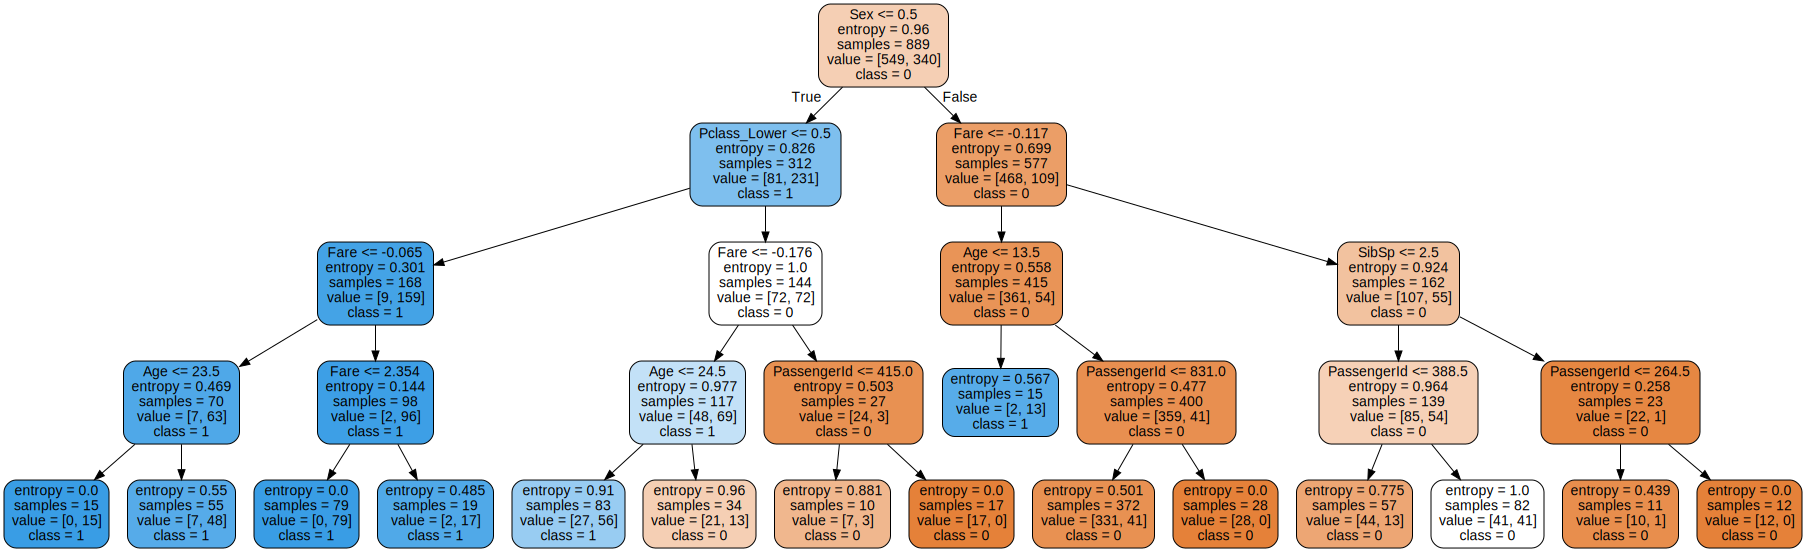

In [66]:
# plot the decision tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X_train.columns,   
                                filled=True, rounded=True,class_names = ["0","1"])
graph = graphviz.Source(dot_data) 
graph

In [67]:
y_pred = clf.predict(test_smf_logit_x)

In [68]:
decisiontrees_result = pd.DataFrame(y_pred, test_x['PassengerId'])
decisiontrees_result = decisiontrees_result.reset_index()
decisiontrees_result.columns = ['PassengerId', 'Survived']
decisiontrees_result.to_csv('attempt1_decisiontrees.csv', index = False)
#Result1 : 0.70813 accuracy for 'gini'
#Result2 : 0.77511 accuracy for 'entropy'


In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4], 'max_depth': list(range(2, 6))}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(criterion='entropy',random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(train_smf_logit_x, train_smf_logit_y)

Fitting 3 folds for each of 1176 candidates, totalling 3528 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3528 out of 3528 | elapsed:   16.0s finished


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [74]:
best_model = grid_search_cv.best_estimator_

In [77]:
y_pred = best_model.predict(test_smf_logit_x)

In [78]:
decisiontrees_result = pd.DataFrame(y_pred, test_x['PassengerId'])
decisiontrees_result = decisiontrees_result.reset_index()
decisiontrees_result.columns = ['PassengerId', 'Survived']
decisiontrees_result.to_csv('attempt1_decisiontrees.csv', index = False)